In [1]:
import mdtraj as md
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
from pyemma.plots import plot_free_energy

/Users/robertarbon/opt/miniconda3/envs/msms/lib/python3.6/site-packages/pyemma/util/log.py:65: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  D = yaml.load(f2)


You are still using msmtools from the deprecated Omnia channel. Please switch to conda-forge to catch future updates.
In order to do so please set conda-forge channel to highest priority by:

    conda config --add channels conda-forge

and update this package by:

    conda update msmtools




In [2]:
df = pd.read_csv('outputs/bond_distances.csv')
df.head()

/Users/robertarbon/opt/miniconda3/envs/msms/lib/python3.6/site-packages/pyemma/__init__.py:91: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.4.
  .format(latest=latest, current=current), category=UserWarning)


,O1-C1,O2-C1,O1-H1_2,O2-H1_2,O1-H1_3,O2-H1_3,HE1-O7,HE1-A82_O,HNT-O7,HNT-D84_O,O7-D84_H,O2-T172_HG1,O1-W160_H,t (ns),Site,Trajectory
0,6.875174,5.308275,7.759610,6.330001,6.018757,4.641057,2.705421,7.697979,3.921303,8.843194,7.440354,3.258005,11.120585,0.0,D,1
1,7.128008,5.675781,8.152232,6.772096,6.369770,5.178163,2.824286,7.412381,3.874804,9.318459,6.765398,3.582511,11.332563,0.1,D,1
2,7.605552,6.081725,8.482392,7.086111,6.658348,5.269552,2.816311,7.364306,3.822538,9.441319,7.247026,3.900266,12.328999,0.2,D,1
3,7.731701,6.114228,8.719089,7.173695,6.994192,5.571330,2.698241,7.198877,3.835933,8.660033,7.490273,4.248365,11.989642,0.3,D,1
4,7.442666,5.822797,8.462521,6.906297,6.736796,5.338418,2.846999,6.844606,3.848145,8.574182,7.342651,3.371260,12.196320,0.4,D,1


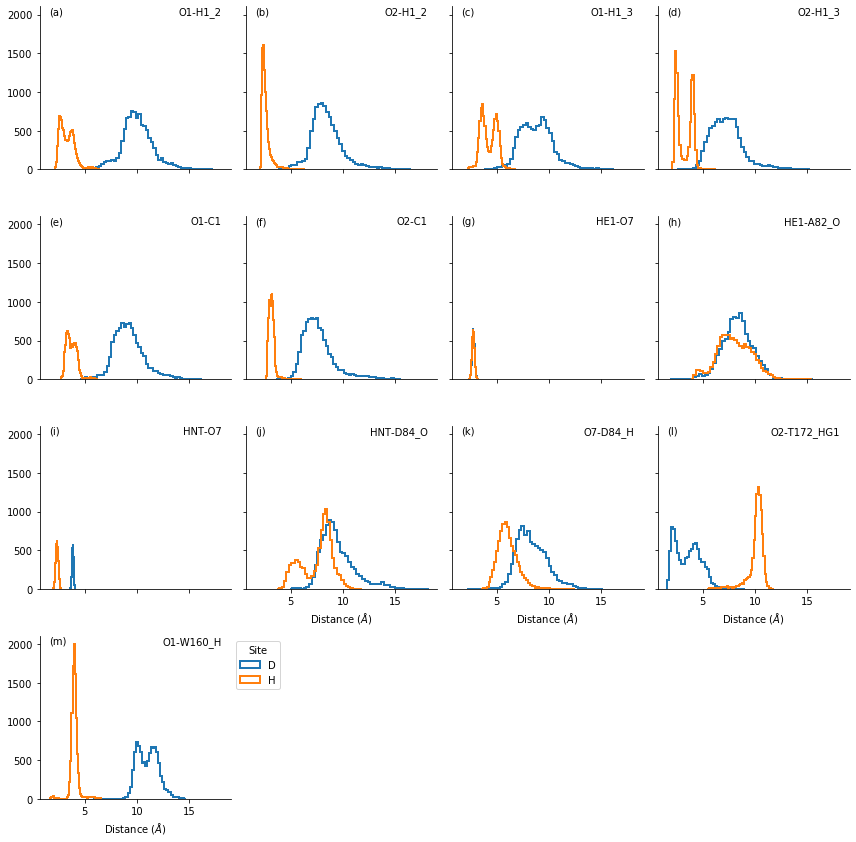

In [4]:
d_lab = r'Distance ($\AA$)'
dists_l = df.melt(id_vars=['t (ns)', 'Site', 'Trajectory'], 
                     var_name='Bond', value_name=d_lab)

order = ['O1-H1_2', 'O2-H1_2', 'O1-H1_3',   'O2-H1_3', 'O1-C1', 'O2-C1', 'HE1-O7', 
         'HE1-A82_O', 'HNT-O7', 'HNT-D84_O', 'O7-D84_H', 'O2-T172_HG1', 'O1-W160_H']

sample = dists_l.loc[dists_l['t (ns)'].isin(np.arange(0, 100, 1)), :].copy(deep=True)

with sns.plotting_context(font_scale=1.25):
    g = sns.FacetGrid(data=sample, hue='Site', col_order=order,  col='Bond', col_wrap=4)
    g.map(sns.distplot, d_lab, kde=False, 
          hist_kws={"histtype": "step", "linewidth": 2,"alpha": 1})
    g.set_titles("")
    labs = g.col_names
    lets = list('abcdefghijklmnop')
    for i, ax in enumerate(g.axes.flatten()):
        ax.annotate('({0})'.format(lets[i]), xy=(0.05, 0.95), 
                    xycoords='axes fraction')
        ax.annotate('{0}'.format(labs[i]), xy=(0.95, 0.95), 
                    xycoords='axes fraction', horizontalalignment='right')
    g.axes.flatten()[-1].legend(bbox_to_anchor=(1,1), title='Site', loc='upper left')
    plt.savefig('outputs/bond_distances_dist.png', dpi=450, bbox_inches='tight')

In [5]:
# X = df.loc[:, df.columns.difference(['t (ns)', 'Site', 'Trajectory'])].values

def plot(i, j, site='D'):
    if(site=='H'):
        states = ['O1-C1', 'O1-H1_2', 'O1-H1_3', 'O2-H1_3', 'HNT-D84_O']
    else:
        states = ['O2-T172_HG1', 'O1-W160_H']
        
    X = df.loc[df['Site']==site, states].values
    fig, ax = plt.subplots()
    plot_free_energy(X[:, i], X[:, j], cmap='viridis_r', ax=ax)
    ax.set_ylabel(states[j])
    ax.set_xlabel(states[i])
    return ax

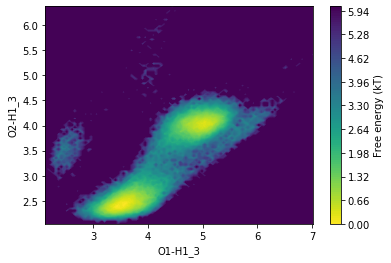

In [10]:
_ = plot(2, 3, site='H')
plt.savefig('outputs/H_2_3_free_energy.png', dpi=450, bbox_inches='tight') 

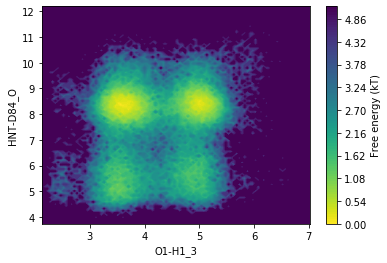

In [11]:
_ = plot(2, 4, site='H')
plt.savefig('outputs/H_2_4_free_energy.png', dpi=450, bbox_inches='tight') 

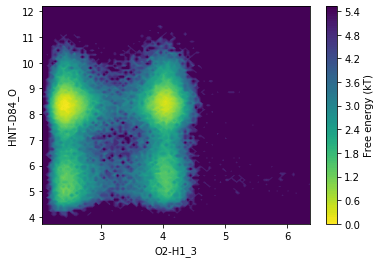

In [12]:
_ = plot(3, 4, site='H')
plt.savefig('outputs/H_3_4_free_energy.png', dpi=450, bbox_inches='tight') 

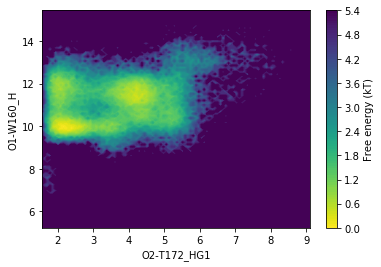

In [13]:
_ = plot(0, 1, site='D')
plt.savefig('outputs/D_0_1_free_energy.png', dpi=450, bbox_inches='tight') 